<a href="https://colab.research.google.com/github/JS19563255/2022bioinfo1_project/blob/main/myownproject/script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')
## 실습용 Bioconda 환경 설치하기
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

##추가 필요한 프로그램 설치
!conda install -y bedtools bioawk

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
fatal: destination path 'colab-biolab' already exists and is not an empty directory.
./
./root/
./root/.bashrc.biolab
./root/.bin.priority/
./root/.bin.priority/pip3
./root/.bin.priority/pip
./root/.bin.priority/pip2
./root/.tmux.conf
./root/.vimrc
./root/.profile
./root/.condarc
PREFIX=/root/conda
Unpacking payload ...
Solving environment: | / - \ done

# All requested packages already installed.

installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please verify that your PYTHONPATH only points to
    directories of packages that are compatible with the Python interpreter
    in Miniconda3: /root/conda
Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - 

In [7]:
%cd /content/drive/MyDrive/binfo1-work/

/content/drive/MyDrive/binfo1-work


In [8]:
import pandas as pd
import numpy as np

In [9]:
ls

chr10.fasta                         GL456367.1.fasta
chr11.fasta                         GL456368.1.fasta
chr12.fasta                         GL456370.1.fasta
chr13.fasta                         GL456372.1.fasta
chr14.fasta                         GL456378.1.fasta
chr15.fasta                         GL456379.1.fasta
chr16.fasta                         GL456381.1.fasta
chr17.fasta                         GL456382.1.fasta
chr18.fasta                         GL456383.1.fasta
chr19.fasta                         GL456385.1.fasta
chr19.fasta.fai                     GL456387.1.fasta
chr1.bed                            GL456389.1.fasta
chr1.fasta                          GL456390.1.fasta
chr1.fasta.fai                      GL456392.1.fasta
chr2.fasta                          GL456394.1.fasta
chr3.fasta                          GL456396.1.fasta
chr4.fasta                          GRCm39.primary_assembly.genome.fa
chr5.fasta                          JH584295.1.fasta
chr6.fasta                   

In [10]:
#!samtools mpileup CLIP-35L33G.bam > CLIP-35L33G.pileup
#!wc -l CLIP-35L33G.pileup

In [11]:
#!tail CLIP-35L33G.pileup

논문과 같이 depth 50 이하는 cutoff

In [12]:
#!awk '$4 > 50 {print $0;}' CLIP-35L33G.pileup > filtered_CLIP-35L33G.pileup
#!wc -l filtered_CLIP-35L33G.pileup

In [13]:
!tail filtered_CLIP-35L33G.pileup

MU069435.1	1559	N	346	>>>>TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT$TT$T$T$TTTTTTTTTTTTTTT$TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT	DIDHGHIIIIIIEEIEIGIIEGGBGGDG:BEBHDDFBIGIEHGIIGIIIHBGIBB>G?DI3IGBEI7GGGGI4GII=G?IIGDIIHIIEHGIHIHGEIHIG=EIHGIIHIGIIIIDIDIIIEIIIIIIGIHIIFI@GGIIIIBIIEIGHH?@IAIGI@HIBHHHFAGIGHGHDIIGIGIIBGIEFHIGGIIIIGHIHIDIIFIHIGGIH@DHGHHDIEDIIEIII8GDHHGHIBGIIHIDIAIGIHIIHEG4II>HD?IH@IFIHGIGDHH;AFGH@EGH:BCHG>IEIDIHIHIIHIIIIIIHHGHIGIIGIGFHGCII=HD@HI?IIIGHGGIHIGIDDH>HFB
MU069435.1	1560	N	341	>>>>TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT$T$T$T$TT$T$TT$T$T$T$TT$TT$TT$TTT$TT$T$T$TT$TT$T$TTT$T$TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT

In [14]:
import pandas as pd
readcut_pileup = pd.read_csv('filtered_CLIP-35L33G.pileup', sep='\t', names=['chrom', 'pos', '_ref', 'count', 'basereads', 'quals'])
readcut_pileup.head()

,chrom,pos,_ref,count,basereads,quals
0,chr1,3222722,N,124,CCCAAAAAAAAAAAAAAAAAAAAAAAAA^!A^!A^!A^!A^!A^!A...,HCGGHEIHHHIBDDIIIGIG>GIHGDHHDDIAEIEEBIGIBGG8GI...
1,chr1,3222723,N,146,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...,E>HIHFIIHHIGDFIII<IHBIIHGDHEB?I@HIEIBIII;>G;GI...
2,chr1,3222724,N,155,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,H>GIGHHIHHDG:@IIIBIHDIIHG=HHDDG;IHHH;IIIDG?DIE...
3,chr1,3222725,N,157,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGAGGAGGGGGG...,HGDEHHIIHHIG?DIIIEIGDIIHDBBH=DI;IIHBBIII4GD3GI...
4,chr1,3222726,N,156,GGGAAAAGGAAAGGGGGAAAAGAGGGAGCAAGGAGGGGAGGAGGAG...,HB:IHGIIGGIGDFHII@IFBHGHGBHGCBI@IIHGBIGI;>E@BI...


pileup에서 계산에 사용할 match와 substitution만 남기고 나머지 제거 및 shannon entropy 계산 

In [15]:
import math

def shannon_entropy(sequence_input):

    input_base = set(sequence_input)
    M   =  len(sequence_input)
    entropy_list = []
    for base in input_base:
        n_i = sequence_input.count(base)
        P_i = n_i/float(M) 
        entropy_i = P_i*(math.log(P_i,2))
        entropy_list.append(entropy_i)

    sh_entropy = -(sum(entropy_list))

    return sh_entropy

In [16]:
import re
toremove = re.compile('[<>$*#^]')
readcut_pileup['matches'] = readcut_pileup['basereads'].apply(lambda x: toremove.sub('', x))
readcut_pileup['entropy']= readcut_pileup['matches'].apply(shannon_entropy)
readcut_pileup.head()

,chrom,pos,_ref,count,basereads,quals,matches,entropy
0,chr1,3222722,N,124,CCCAAAAAAAAAAAAAAAAAAAAAAAAA^!A^!A^!A^!A^!A^!A...,HCGGHEIHHHIBDDIIIGIG>GIHGDHHDDIAEIEEBIGIBGG8GI...,CCCAAAAAAAAAAAAAAAAAAAAAAAAA!A!A!A!A!A!A!A!A!A...,1.080934
1,chr1,3222723,N,146,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...,E>HIHFIIHHIGDFIII<IHBIIHGDHEB?I@HIEIBIII;>G;GI...,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG...,0.545662
2,chr1,3222724,N,155,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,H>GIGHHIHHDG:@IIIBIHDIIHG=HHDDG;IHHH;IIIDG?DIE...,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,0.351828
3,chr1,3222725,N,157,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGAGGAGGGGGG...,HGDEHHIIHHIG?DIIIEIGDIIHDBBH=DI;IIHBBIII4GD3GI...,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGAGGAGGGGGG...,0.203572
4,chr1,3222726,N,156,GGGAAAAGGAAAGGGGGAAAAGAGGGAGCAAGGAGGGGAGGAGGAG...,HB:IHGIIGGIGDFHII@IFBHGHGBHGCBI@IIHGBIGI;>E@BI...,GGGAAAAGGAAAGGGGGAAAAGAGGGAGCAAGGAGGGGAGGAGGAG...,1.401164


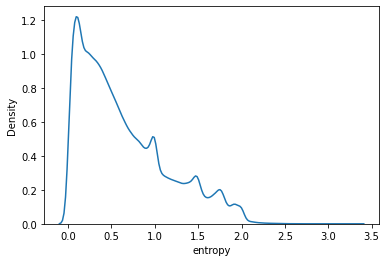

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(readcut_pileup[readcut_pileup['entropy']>0]['entropy'])
plt.show()

In [18]:
plt.savefig('./entropy.png')

<Figure size 432x288 with 0 Axes>

In [19]:
#readcut_pileup.to_csv('readcut_pileup.csv', sep="\t", header=None, index=False)

entropy plot 확인 및 reference 논문 기반으로 cutoff값을 대략적으로 0.8정도로 설정

positive strand, negative strand 분리해서 분석필요함.

In [20]:
rc_ec_pileup = readcut_pileup[(readcut_pileup['entropy'] >= 0.8)]
potivie_rc_ec_pileup = rc_ec_pileup[~rc_ec_pileup['matches'].str.contains('[ATGCnN]')]
negative_rc_ec_strand = rc_ec_pileup[~rc_ec_pileup['matches'].str.contains('[atgcnN]')]
negative_rc_ec_strand['matches'] = negative_rc_ec_strand['matches'].str.upper()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [102]:
positive_strand = potivie_rc_ec_pileup[['chrom','pos']]
positive_strand['start'] = positive_strand['pos'] - 8
positive_strand['end'] = positive_strand['pos'] + 10 
positive_strand.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,chrom,pos,start,end
166,chr1,4329962,4329954,4329972
807,chr1,4758250,4758242,4758260
1123,chr1,4846719,4846711,4846729
1191,chr1,4846797,4846789,4846807
1200,chr1,4846806,4846798,4846816


In [103]:
negative_strand = negative_rc_ec_strand[['chrom','pos']]
negative_strand['start'] = negative_strand['pos'] - 9
negative_strand['end'] = negative_strand['pos'] + 9
negative_strand.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,chrom,pos,start,end
0,chr1,3222722,3222713,3222731
4,chr1,3222726,3222717,3222735
28,chr1,3224558,3224549,3224567
46,chr1,3224576,3224567,3224585
167,chr1,4599261,4599252,4599270


In [104]:
positive_bed = positive_strand[['chrom','start','end']]
negative_bed = negative_strand[['chrom','start','end']]

In [105]:
dict_df = {}
for chromosome in set(positive_bed["chrom"]):
   dict_df[chromosome] = positive_bed[positive_bed["chrom"] == chromosome]
   dict_df[chromosome].to_csv(f"positive_strand_{chromosome}.bed", sep="\t", header=None, index=False)


In [106]:
negative_bed.head()

dict_df = {}
for chromosome in set(negative_bed["chrom"]):
    dict_df[chromosome] = negative_bed[negative_bed["chrom"] == chromosome]
    dict_df[chromosome].to_csv(f"negative_strand_{chromosome}.bed", sep="\t", header=None, index=False)

reference dataset 다운 (시간이 너무 오래걸려 따로 다운 받아서 사용함)
Genome sequence, primary assembly (GRCm39) from https://www.gencodegenes.org/mouse/release_M29.html

In [107]:
#!gzip -d GRCm39.primary_assembly.genome.fa.gz

In [108]:
!pip install biopython
from Bio import SeqIO


#for seq_record in SeqIO.parse("GRCm39.primary_assembly.genome.fa", "fasta"):
#  print(seq_record.id)
#  print(seq_record.description)
#  SeqIO.write([seq_record], f"{seq_record.id}.fasta", "fasta") 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [109]:
!ls -alh

total 27G
-rw------- 1 root root  127M Jun  9 10:11 chr10.fasta
-rw------- 1 root root    25 Jun 10 00:15 chr10.fasta.fai
-rw------- 1 root root  119M Jun  9 10:11 chr11.fasta
-rw------- 1 root root    25 Jun 10 00:15 chr11.fasta.fai
-rw------- 1 root root  117M Jun  9 10:11 chr12.fasta
-rw------- 1 root root    25 Jun 10 00:15 chr12.fasta.fai
-rw------- 1 root root  118M Jun  9 10:11 chr13.fasta
-rw------- 1 root root    25 Jun 10 00:15 chr13.fasta.fai
-rw------- 1 root root  122M Jun  9 10:11 chr14.fasta
-rw------- 1 root root    25 Jun 10 00:16 chr14.fasta.fai
-rw------- 1 root root  101M Jun  9 10:11 chr15.fasta
-rw------- 1 root root    25 Jun 10 00:15 chr15.fasta.fai
-rw------- 1 root root   96M Jun  9 10:11 chr16.fasta
-rw------- 1 root root    24 Jun 10 00:15 chr16.fasta.fai
-rw------- 1 root root   93M Jun  9 10:11 chr17.fasta
-rw------- 1 root root    24 Jun 10 00:15 chr17.fasta.fai
-rw------- 1 root root   88M Jun  9 10:11 chr18.fasta
-rw------- 1 root root    24 Jun 10 00:1

In [110]:
import os
for chrom in set(negative_strand["chrom"]):
    os.system(f'bedtools getfasta -fi "{chrom}.fasta" -bed "negative_strand_{chrom}.bed" -fo "negative_strand_{chrom}.fa.out"')
    print(chrom)

chr6
chr5
chr17
chr10
chr18
chrY
chr13
MU069435.1
chr9
chr8
chrX
chr4
chr12
chr16
chr15
chr1
chr3
chr19
chr7
chr2
chr11
chr14
chrM


In [111]:
for chrom in set(positive_bed["chrom"]):
    os.system(f'bedtools getfasta -fi "{chrom}.fasta" -bed "positive_strand_{chrom}.bed" -fo "positive_strand_{chrom}.fa.out"')
    os.system(f'head positive_strand_{chrom}.bed')
    print(chrom)

chr6
chr5
chr17
chr10
chr18
chrY
chr13
chr9
chr8
chrX
chr4
chr12
chr16
chr15
chr1
chr3
chr19
chr7
chr2
chr11
chr14
chrM


In [112]:
!head negative_strand_chr1.fa.out

>chr1:3222713-3222731
CAAAATTTAGAGGCGTAG
>chr1:3222717-3222735
ATTTAGAGGCGTAGACAG
>chr1:3224549-3224567
TTTTTCATGAGATGAAGA
>chr1:3224567-3224585
TGGAGCGCGGTGGCTGCC
>chr1:4599252-4599270
CAGCACATATACTAAAAT


In [113]:
!head positive_strand_chr8.fa.out

>chr8:3202217-3202235
ACATCTCCCAAAACTCAA
>chr8:3204809-3204827
CAATTCACCAAGCATCAG
>chr8:3204810-3204828
AATTCACCAAGCATCAGT
>chr8:3205095-3205113
TGCAGAGCATATAATTCT
>chr8:3660942-3660960
GCATCTCCCTGATGGTAT


In [135]:
print(os.getcwd())

/content/drive/MyDrive/binfo1-work


In [136]:
import os
directory = '/content/drive/MyDrive/binfo1-work/weblogo/'
outfile_name = 'positive_merge.fasta'
out_file = open(outfile_name, 'w')
files = os.listdir(directory)
for filename in files:
    if "positive" not in filename:
        continue
    file = open(directory + filename)
    for line in file:
        out_file.write(line)
    out_file.write("\n")
    file.close()
out_file.close()

In [137]:
import os
directory = '/content/drive/MyDrive/binfo1-work/weblogo/'
outfile_name = 'raw_negative_merge.fasta'
out_file = open(outfile_name, 'w')
files = os.listdir(directory)
for filename in files:
    if "negative" not in filename:
        continue
    file = open(directory + filename)
    for line in file:
        out_file.write(line)
    out_file.write("\n")
    file.close()

out_file.close()

In [138]:
from Bio import SeqIO
fasta_list = []
for seq in list(SeqIO.parse(outfile_name, "fasta")):
    seq.seq = seq.seq.reverse_complement()
    fasta_list.append(seq)

SeqIO.write(fasta_list, "negative_merge.fasta", "fasta")


83220

In [139]:
!head negative_merge.fasta

>chr6:3200759-3200777
CACGGGGGGCTCAAAACT
>chr6:3200964-3200982
CTGTATTGTTATTTTTCG
>chr6:3201082-3201100
AATATACGCTATTGGAGC
>chr6:3201279-3201297
TATCCAGGCGGCTCGGGC
>chr6:3201447-3201465
AAACATTCTTGGCAAATG


In [140]:
filenames = ['positive_merge.fasta', 'negative_merge.fasta']

with open('final_merge.fasta', 'w') as outfile:
    for filename in filenames:
        with open(filename) as file:
            for line in file:
                outfile.write(line)

In [141]:
!head final_merge.fasta

>chr6:6041529-6041547
CAAAGCACTTCCTTAGCA
>chr6:6134226-6134244
TTGGTTGTCACGTGGCAT
>chr6:6135538-6135556
AATAGCTAGCATTGGGGT
>chr6:6135570-6135588
CAACACGGAAGCAAAATT
>chr6:6139737-6139755
TAGAAAGGGTTCTCACAA


In [142]:
text_test = pd.read_csv('/content/drive/MyDrive/binfo1-work/final_merge.fasta', sep='\n')
text_test.head()

,>chr6:6041529-6041547
0,CAAAGCACTTCCTTAGCA
1,>chr6:6134226-6134244
2,TTGGTTGTCACGTGGCAT
3,>chr6:6135538-6135556
4,AATAGCTAGCATTGGGGT


In [146]:
rawseq = text_test.iloc[::2,:]
rawseq.rename(columns = {'>chr6:6041529-6041547' : 'seq'}, inplace = True)
rawseq.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,seq
0,CAAAGCACTTCCTTAGCA
2,TTGGTTGTCACGTGGCAT
4,AATAGCTAGCATTGGGGT
6,CAACACGGAAGCAAAATT
8,TAGAAAGGGTTCTCACAA


In [248]:
hexamerseq = rawseq.copy()
hexamerseq['hexamer'] = hexamerseq.seq.str[6:12]
hexamerseq['center'] = hexamerseq.hexamer.str[2]
hexamerseq.head()

,seq,3rd,hexamer,center
0,CAAAGCACTTCCTTAGCA,A,ACTTCC,T
2,TTGGTTGTCACGTGGCAT,G,GTCACG,C
4,AATAGCTAGCATTGGGGT,T,TAGCAT,G
6,CAACACGGAAGCAAAATT,A,GGAAGC,A
8,TAGAAAGGGTTCTCACAA,G,GGGTTC,G


In [249]:
hexamer = hexamerseq[hexamerseq['center'] == 'G']
hexamer.head()

,seq,3rd,hexamer,center
4,AATAGCTAGCATTGGGGT,T,TAGCAT,G
8,TAGAAAGGGTTCTCACAA,G,GGGTTC,G
38,TGGCGTATGTGACAAACC,G,ATGTGA,G
44,AGTATCCCGTCCTGCTTT,T,CCGTCC,G
60,ATCACCACGCTGTCTGTG,C,ACGCTG,G


In [250]:
hexamer = hexamer[['seq']]
hexamer.head()

,seq
4,AATAGCTAGCATTGGGGT
8,TAGAAAGGGTTCTCACAA
38,TGGCGTATGTGACAAACC
44,AGTATCCCGTCCTGCTTT
60,ATCACCACGCTGTCTGTG


In [251]:
hex = hexamer.value_counts('seq').rename_axis('seq').reset_index(name='counts')
hex.head()

,seq,counts
0,AGTTTCCCGCATTTGGGG,5
1,TCTACAGAGTGAGTTCCA,5
2,CACCATGTGGTTGCTGGG,5
3,GAGAGAGAGAGAGAGAGA,4
4,ACACTGTAGCTGTCTTCA,4


In [253]:
hex.to_csv('hex.csv', sep="\t", header=None, index=False)

In [254]:
from  Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
from Bio.Seq import Seq
import pandas as pd
df = pd.read_csv("hex.csv", sep="\t", header=None, names=["seq", "counts"])
print(df)
seq_list = []
for n, _ in enumerate(df["seq"]):
    seq_list += [SeqRecord(seq=Seq(df["seq"][n]), id=str(n), description=str(n))] * df[
        "counts"
    ][n]
SeqIO.write(seq_list, "out.fasta", "fasta")

                      seq  counts
0      AGTTTCCCGCATTTGGGG       5
1      TCTACAGAGTGAGTTCCA       5
2      CACCATGTGGTTGCTGGG       5
3      GAGAGAGAGAGAGAGAGA       4
4      ACACTGTAGCTGTCTTCA       4
...                   ...     ...
11345  CAGAGTGTGTATATAGGG       1
11346  CAGAGTTGGTAAGGACAG       1
11347  CAGATAAGGTCTCTCCAG       1
11348  CAGATAGAGTAGCTGAGG       1
11349  TTTTTTTGGGTTTTTTCA       1

[11350 rows x 2 columns]


11443

In [255]:
!head out.fasta

>0
AGTTTCCCGCATTTGGGG
>0
AGTTTCCCGCATTTGGGG
>0
AGTTTCCCGCATTTGGGG
>0
AGTTTCCCGCATTTGGGG
>0
AGTTTCCCGCATTTGGGG


데이터 시각화는 weblogo site에 직접 업로드하여 확인함.